Loading Dataset

In [123]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, r2_score, auc
from sklearn.model_selection import train_test_split


# Reading Dataset

In [125]:
heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics/heart.csv')
#saturation_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics/o2Saturation.csv')


In [126]:
# ignoring as o2 saturation file is considered as unwanted data
# concatinating heart and o2satuation csv file
#df = pd.concat([heart_data, saturation_data], axis=1, join='inner')
#df.rename(columns={'98.6':'o2'}).head()


In [127]:
# To find the missing values in Dataset
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [128]:
#heart_data.corr()
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [129]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Checking Skewness of Input Attributes

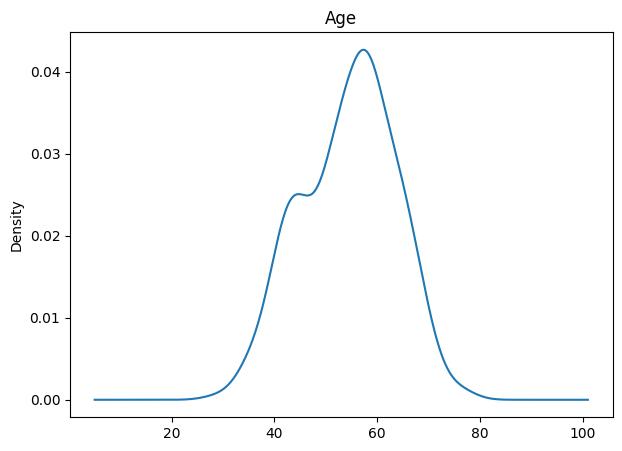

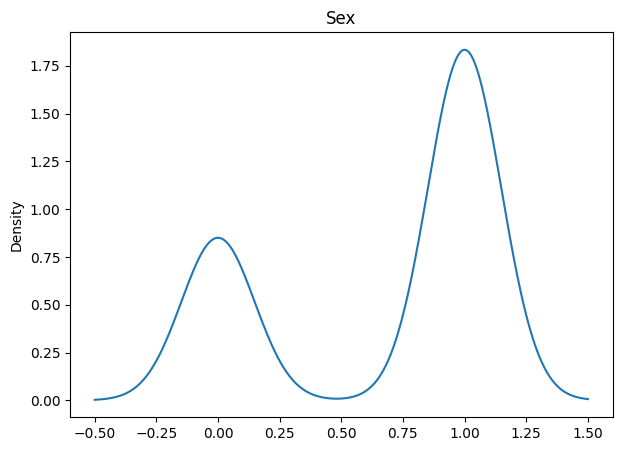

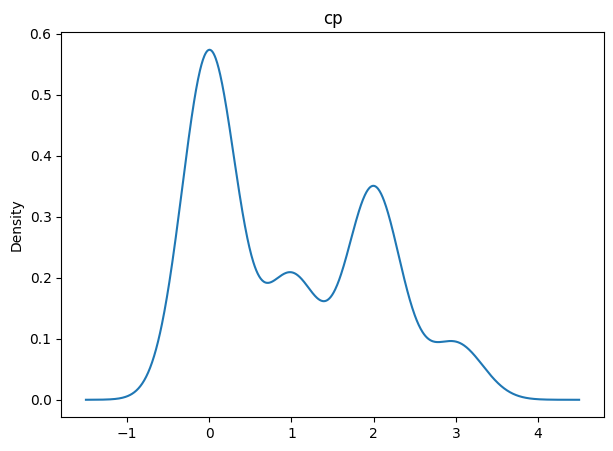

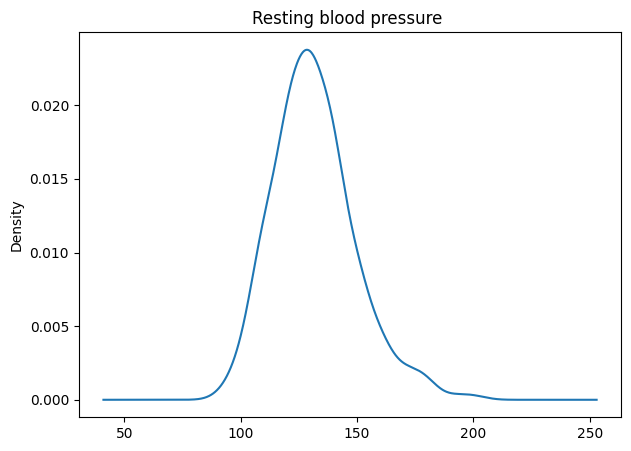

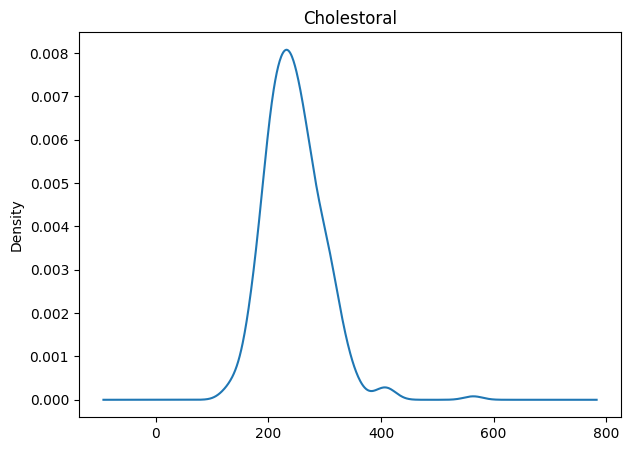

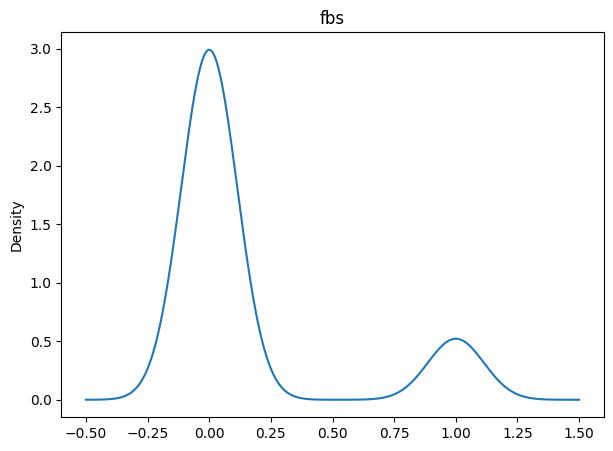

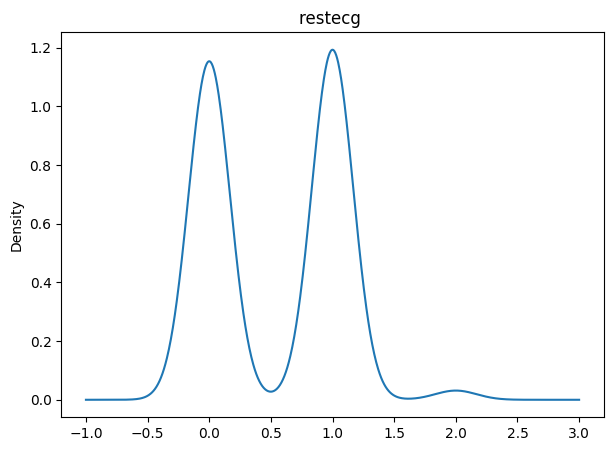

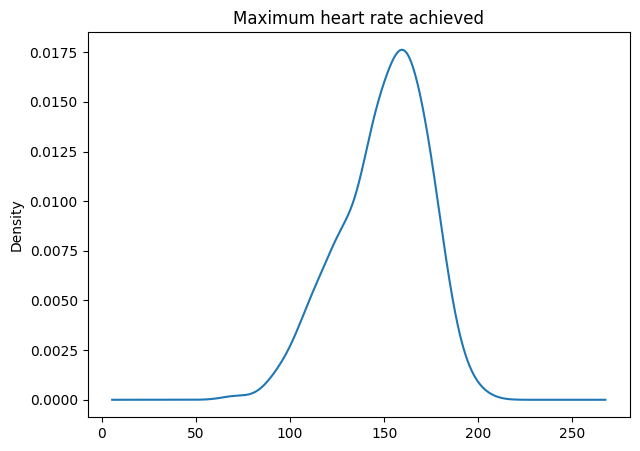

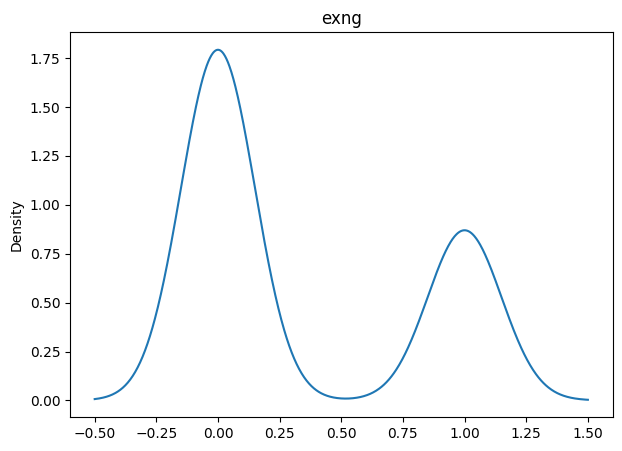

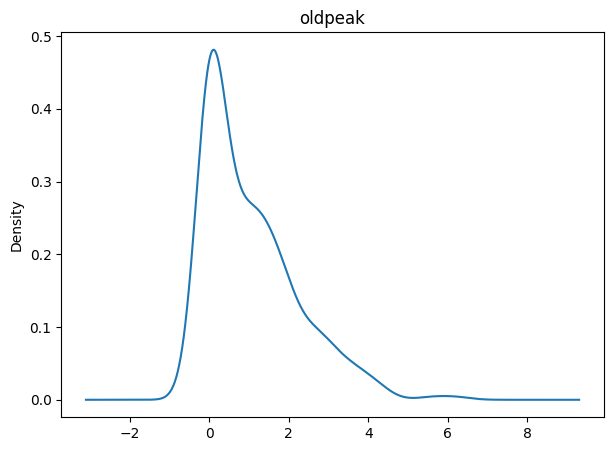

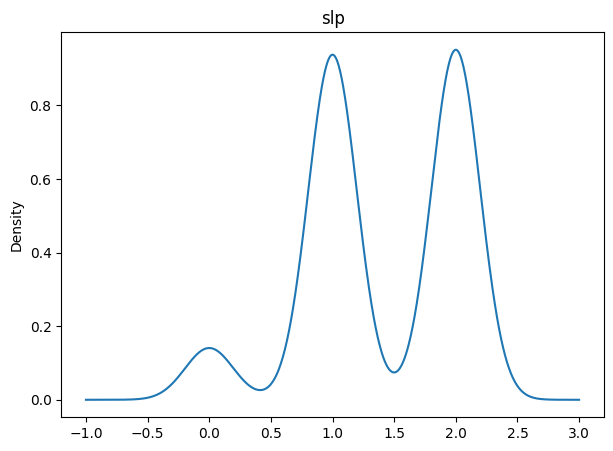

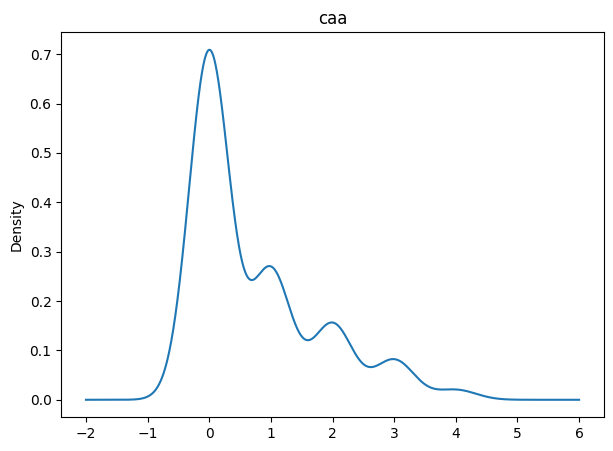

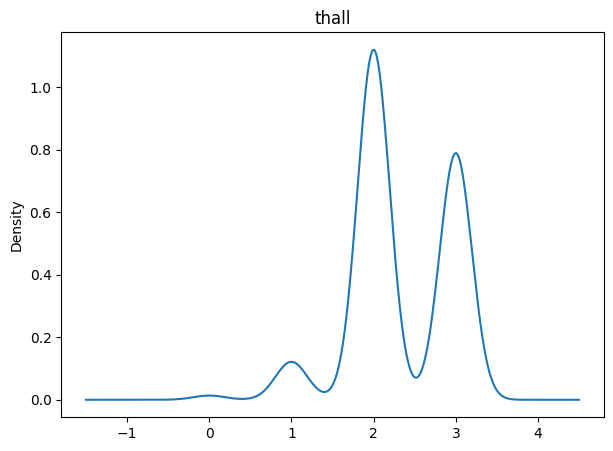

In [130]:
plt.figure(figsize=(7,5))
heart_data['age'].plot(kind='density')
plt.title("Age")
plt.show()

plt.figure(figsize=(7,5))
heart_data['sex'].plot(kind='density')
plt.title("Sex")
plt.show()

plt.figure(figsize=(7,5))
heart_data['cp'].plot(kind='density')
plt.title("cp")
plt.show()

plt.figure(figsize=(7,5))
heart_data['trtbps'].plot(kind='density')
plt.title("Resting blood pressure ")
plt.show()

plt.figure(figsize=(7,5))
heart_data['chol'].plot(kind='density')
plt.title("Cholestoral")
plt.show()

plt.figure(figsize=(7,5))
heart_data['fbs'].plot(kind='density')
plt.title("fbs")
plt.show()

plt.figure(figsize=(7,5))
heart_data['restecg'].plot(kind='density')
plt.title("restecg ")
plt.show()

plt.figure(figsize=(7,5))
heart_data['thalachh'].plot(kind='density')
plt.title("Maximum heart rate achieved")
plt.show()

plt.figure(figsize=(7,5))
heart_data['exng'].plot(kind='density')
plt.title("exng")
plt.show()

plt.figure(figsize=(7,5))
heart_data['oldpeak'].plot(kind='density')
plt.title("oldpeak")
plt.show()

plt.figure(figsize=(7,5))
heart_data['slp'].plot(kind='density')
plt.title("slp")
plt.show()

plt.figure(figsize=(7,5))
heart_data['caa'].plot(kind='density')
plt.title("caa")
plt.show()

plt.figure(figsize=(7,5))
heart_data['thall'].plot(kind='density')
plt.title("thall")
plt.show()

In [131]:
# +1 or below -1, data is highly skewed
# +0.5 to -0.5, it is moderately skewed
# value is 0, then the data is symmetric
heart_data.skew().sort_values(ascending=False)

fbs         1.986652
caa         1.310422
oldpeak     1.269720
chol        1.143401
exng        0.742532
trtbps      0.713768
cp          0.484732
restecg     0.162522
output     -0.179821
age        -0.202463
thall      -0.476722
slp        -0.508316
thalachh   -0.537410
sex        -0.791335
dtype: float64

# Skewness testing 1

In [132]:

#sns.displot(heart_data["fbs"],kde=True)
# plt.title("DISTRIBUTION OF CHOLESTROL LEVEL",fontsize=20)
# skewness=str(heart_data["fbs"].skew())
# kurtosis=str(heart_data["fbs"].kurt())
# plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
# plt.show()

In [133]:

# plt.figure(figsize=(20,8))

# ## log transformation
# plt.subplot(1,4,1)
# sns.distplot(heart_data["fbs"])
# plt.title("DISTRIBUTION BEFORE",)
# skewness=str(heart_data["fbs"].skew())
# plt.legend([skewness],title=("skewness"))


# plt.subplot(1,4,2)
# stats.probplot(heart_data["fbs"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(1,4,3)
# # log_target=np.log1p(heart_data["fbs"])
# # ax=sns.distplot(log_target)
# sqrt_target = heart_data["fbs"]**(1/2)
# ax=sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER LOG ",)
# # skewness=str(log_target.skew())
# skewness=str(sqrt_target.skew())
# plt.legend([skewness],title=("skewness"))
# #plt.show()
# heart_data["fbs"] = sqrt_target
# print(heart_data["fbs"])

# plt.subplot(1,4,4)
# # stats.probplot(log_target,dist="norm",plot=plt)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()

In [134]:
# plt.figure(figsize=(20,8))


# plt.subplot(1,4,1)
# sns.distplot(heart_data["trtbps"])
# plt.title("DISTRIBUTION BEFORE",)
# skewness=str(heart_data["trtbps"].skew())
# plt.legend([skewness],title=("skewness"))


# plt.subplot(1,4,2)
# stats.probplot(heart_data["trtbps"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(1,4,3)
# bcx_target, lam = boxcox(heart_data["trtbps"])
# # sqrt_target = heart_data["trtbps"]**(1/2)
# # ax=sns.distplot(sqrt_target)
# #lam is the best lambda for the distribution
# sns.distplot(bcx_target)
# #log_target=np.log1p(heart_data["trtbps"])
# #ax=sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER BOX-COX ",)
# #series=pd.Series(bcx_target)
# #series = pd.Series(log_target)
# skewness=str(series.skew())
# plt.legend([skewness],title=("skewness"))
# #plt.show()

# plt.subplot(1,4,4)
# stats.probplot(series,dist="norm",plot=plt)
# plt.grid()


In [135]:
# plt.figure(figsize=(25,38))

# ## log transformation
# plt.subplot(5,4,1)
# sns.distplot(heart_data["chol"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["chol"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,2)
# stats.probplot(heart_data["chol"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,3)
# log_target=np.log1p(heart_data["chol"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()


# #2
# ### square root transformation
# plt.subplot(5,4,5)
# sns.distplot(heart_data["chol"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["chol"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,6)
# stats.probplot(heart_data["chol"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,7)
# sqrt_target = heart_data["chol"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# #3
# ## reciprocal transformation
# plt.subplot(5,4,9)
# sns.distplot(heart_data["chol"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["chol"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,10)
# stats.probplot(heart_data["chol"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,11)
# reciprocal_target = 1/heart_data["chol"]
# sns.distplot(reciprocal_target)
# plt.title("DISTRIBUTION AFTER RECIPROCAL ",fontsize=20)
# skewness=str(reciprocal_target.skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,12)
# stats.probplot(reciprocal_target,dist="norm",plot=plt)
# plt.grid()

# #4
# ## 4. Box-Cox Transformation:
# plt.subplot(5,4,13)
# sns.distplot(heart_data["chol"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["chol"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,14)
# stats.probplot(heart_data["chol"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,15)
# bcx_target, lam = boxcox(heart_data["chol"])
# #lam is the best lambda for the distribution

# sns.distplot(bcx_target)
# plt.title("DISTRIBUTION AFTER BOXCOX ",fontsize=20)
# series=pd.Series(bcx_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,16)
# stats.probplot(bcx_target,dist="norm",plot=plt)
# plt.grid()

# # 5. Yeo-Johnson Transformation:
# plt.subplot(5,4,17)
# sns.distplot(heart_data["chol"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["chol"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,18)
# stats.probplot(heart_data["chol"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,19)
# yf_target, lam = yeojohnson(heart_data["chol"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

In [136]:
# plt.figure(figsize=(25,38))

# ## log transformation
# plt.subplot(5,4,1)
# sns.distplot(heart_data["age"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["age"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,2)
# stats.probplot(heart_data["age"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,3)
# log_target=np.log1p(heart_data["age"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# heart_data["age"] = log_target
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()


# #2
# ### square root transformation
# plt.subplot(5,4,5)
# sns.distplot(heart_data["age"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["age"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,6)
# stats.probplot(heart_data["age"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,7)
# sqrt_target = heart_data["age"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# #3
# ## reciprocal transformation
# plt.subplot(5,4,9)
# sns.distplot(heart_data["age"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["age"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,10)
# stats.probplot(heart_data["age"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,11)
# reciprocal_target = 1/heart_data["age"]
# sns.distplot(reciprocal_target)
# plt.title("DISTRIBUTION AFTER RECIPROCAL ",fontsize=20)
# skewness=str(reciprocal_target.skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,12)
# stats.probplot(reciprocal_target,dist="norm",plot=plt)
# plt.grid()

# #4
# ## 4. Box-Cox Transformation:
# plt.subplot(5,4,13)
# sns.distplot(heart_data["age"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["age"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,14)
# stats.probplot(heart_data["age"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,15)
# bcx_target, lam = boxcox(heart_data["age"])
# #lam is the best lambda for the distribution

# sns.distplot(bcx_target)
# plt.title("DISTRIBUTION AFTER BOXCOX ",fontsize=20)
# series=pd.Series(bcx_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,16)
# stats.probplot(bcx_target,dist="norm",plot=plt)
# plt.grid()

# # 5. Yeo-Johnson Transformation:
# plt.subplot(5,4,17)
# sns.distplot(heart_data["age"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["age"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,18)
# stats.probplot(heart_data["age"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,19)
# yf_target, lam = yeojohnson(heart_data["age"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

In [137]:
# plt.figure(figsize=(25,38))

# ## log transformation
# plt.subplot(5,4,1)
# sns.distplot(heart_data["sex"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["sex"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,2)
# stats.probplot(heart_data["sex"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,3)
# log_target=np.log1p(heart_data["sex"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()


# #2
# ### square root transformation
# plt.subplot(5,4,5)
# sns.distplot(heart_data["sex"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["sex"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,6)
# stats.probplot(heart_data["sex"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,7)
# sqrt_target = heart_data["sex"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# #3
# ## reciprocal transformation
# # plt.subplot(5,4,9)
# # sns.distplot(heart_data["sex"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["sex"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,10)
# # stats.probplot(heart_data["sex"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,11)
# # reciprocal_target = 1/heart_data["sex"]
# # sns.distplot(reciprocal_target)
# # plt.title("DISTRIBUTION AFTER RECIPROCAL ",fontsize=20)
# # skewness=str(reciprocal_target.skew())
# # print(skewness)
# # plt.legend([skewness],title="skewness",fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,12)
# # stats.probplot(reciprocal_target,dist="norm",plot=plt)
# # plt.grid()

# #4
# ## 4. Box-Cox Transformation:
# # plt.subplot(5,4,13)
# # sns.distplot(heart_data["sex"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["sex"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,14)
# # stats.probplot(heart_data["sex"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,15)
# # bcx_target, lam = boxcox(heart_data["sex"])
# # #lam is the best lambda for the distribution

# # sns.distplot(bcx_target)
# # plt.title("DISTRIBUTION AFTER BOXCOX ",fontsize=20)
# # series=pd.Series(bcx_target)
# # skewness=str(series.skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,16)
# # stats.probplot(bcx_target,dist="norm",plot=plt)
# # plt.grid()

# # # 5. Yeo-Johnson Transformation:
# plt.subplot(5,4,17)
# sns.distplot(heart_data["sex"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["sex"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,18)
# stats.probplot(heart_data["sex"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,19)
# yf_target, lam = yeojohnson(heart_data["sex"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

In [138]:
# plt.figure(figsize=(25,38))

# ## log transformation
# plt.subplot(5,4,1)
# sns.distplot(heart_data["restecg"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["restecg"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,2)
# stats.probplot(heart_data["restecg"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,3)
# log_target=np.log1p(heart_data["restecg"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()


# #2
# ### square root transformation
# plt.subplot(5,4,5)
# sns.distplot(heart_data["restecg"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["restecg"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,6)
# stats.probplot(heart_data["restecg"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,7)
# sqrt_target = heart_data["restecg"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# #3
# ## reciprocal transformation
# # plt.subplot(5,4,9)
# # sns.distplot(heart_data["restecg"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["restecg"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,10)
# # stats.probplot(heart_data["restecg"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,11)
# # reciprocal_target = 1/heart_data["restecg"]
# # sns.distplot(reciprocal_target)
# # plt.title("DISTRIBUTION AFTER RECIPROCAL ",fontsize=20)
# # skewness=str(reciprocal_target.skew())
# # print(skewness)
# # plt.legend([skewness],title="skewness",fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,12)
# # stats.probplot(reciprocal_target,dist="norm",plot=plt)
# # plt.grid()

# #4
# ## 4. Box-Cox Transformation:
# # plt.subplot(5,4,13)
# # sns.distplot(heart_data["restecg"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["restecg"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,14)
# # stats.probplot(heart_data["restecg"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,15)
# # bcx_target, lam = boxcox(heart_data["restecg"])
# # #lam is the best lambda for the distribution

# # sns.distplot(bcx_target)
# # plt.title("DISTRIBUTION AFTER BOXCOX ",fontsize=20)
# # series=pd.Series(bcx_target)
# # skewness=str(series.skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,16)
# # stats.probplot(bcx_target,dist="norm",plot=plt)
# # plt.grid()

# # 5. Yeo-Johnson Transformation:
# plt.subplot(5,4,17)
# sns.distplot(heart_data["restecg"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["restecg"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,18)
# stats.probplot(heart_data["restecg"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,19)
# yf_target, lam = yeojohnson(heart_data["restecg"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

In [139]:
# plt.figure(figsize=(25,38))

# ## log transformation
# plt.subplot(5,4,1)
# sns.distplot(heart_data["oldpeak"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["oldpeak"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,2)
# stats.probplot(heart_data["oldpeak"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,3)
# log_target=np.log1p(heart_data["oldpeak"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()


# #2
# ## square root transformation
# plt.subplot(5,4,5)
# sns.distplot(heart_data["oldpeak"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["oldpeak"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,6)
# stats.probplot(heart_data["oldpeak"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,7)
# sqrt_target = heart_data["oldpeak"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# #3
# ## reciprocal transformation
# # plt.subplot(5,4,9)
# # sns.distplot(heart_data["oldpeak"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["oldpeak"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,10)
# # stats.probplot(heart_data["oldpeak"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,11)
# # reciprocal_target = 1/heart_data["oldpeak"]
# # sns.distplot(reciprocal_target)
# # plt.title("DISTRIBUTION AFTER RECIPROCAL ",fontsize=20)
# # skewness=str(reciprocal_target.skew())
# # print(skewness)
# # plt.legend([skewness],title="skewness",fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,12)
# # stats.probplot(reciprocal_target,dist="norm",plot=plt)
# # plt.grid()

# #4
# ## 4. Box-Cox Transformation:
# # plt.subplot(5,4,13)
# # sns.distplot(heart_data["oldpeak"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["oldpeak"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,14)
# # stats.probplot(heart_data["oldpeak"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,15)
# # bcx_target, lam = boxcox(heart_data["oldpeak"])
# # #lam is the best lambda for the distribution

# # sns.distplot(bcx_target)
# # plt.title("DISTRIBUTION AFTER BOXCOX ",fontsize=20)
# # series=pd.Series(bcx_target)
# # skewness=str(series.skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,16)
# # stats.probplot(bcx_target,dist="norm",plot=plt)
# # plt.grid()

# # 5. Yeo-Johnson Transformation:
# plt.subplot(5,4,17)
# sns.distplot(heart_data["oldpeak"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["oldpeak"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,18)
# stats.probplot(heart_data["oldpeak"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,19)
# yf_target, lam = yeojohnson(heart_data["oldpeak"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

In [140]:
# plt.figure(figsize=(25,38))

# ## log transformation
# plt.subplot(5,4,1)
# sns.distplot(heart_data["thall"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["thall"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,2)
# stats.probplot(heart_data["thall"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,3)
# log_target=np.log1p(heart_data["thall"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()


# #2
# ## square root transformation
# plt.subplot(5,4,5)
# sns.distplot(heart_data["thall"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["thall"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(5,4,6)
# stats.probplot(heart_data["thall"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,7)
# sqrt_target = heart_data["thall"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# #3
# ## reciprocal transformation
# # plt.subplot(5,4,9)
# # sns.distplot(heart_data["thall"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["thall"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,10)
# # stats.probplot(heart_data["thall"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,11)
# # reciprocal_target = 1/heart_data["thall"]
# # sns.distplot(reciprocal_target)
# # plt.title("DISTRIBUTION AFTER RECIPROCAL ",fontsize=20)
# # skewness=str(reciprocal_target.skew())
# # print(skewness)
# # plt.legend([skewness],title="skewness",fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,12)
# # stats.probplot(reciprocal_target,dist="norm",plot=plt)
# # plt.grid()

# #4
# ## 4. Box-Cox Transformation:
# # plt.subplot(5,4,13)
# # sns.distplot(heart_data["thall"])
# # plt.title("DISTRIBUTION BEFORE",fontsize=20)
# # skewness=str(heart_data["thall"].skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,14)
# # stats.probplot(heart_data["thall"],dist="norm",plot=plt)
# # plt.grid()

# # plt.subplot(5,4,15)
# # bcx_target, lam = boxcox(heart_data["thall"])
# # #lam is the best lambda for the distribution

# # sns.distplot(bcx_target)
# # plt.title("DISTRIBUTION AFTER BOXCOX ",fontsize=20)
# # series=pd.Series(bcx_target)
# # skewness=str(series.skew())
# # print(skewness)
# # plt.legend([skewness],title=("skewness"),fontsize=20)
# # #plt.show()

# # plt.subplot(5,4,16)
# # stats.probplot(bcx_target,dist="norm",plot=plt)
# # plt.grid()

# # 5. Yeo-Johnson Transformation:
# plt.subplot(5,4,17)
# sns.distplot(heart_data["thall"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["thall"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,18)
# stats.probplot(heart_data["thall"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(5,4,19)
# yf_target, lam = yeojohnson(heart_data["thall"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(5,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# Reducing Skewness

In [141]:
# plt.figure(figsize=(25,38))

# # Reducing Skewness by applying Yeo-Johnson Transformation for Age Attribute
# plt.subplot(13,4,1)
# sns.distplot(heart_data["age"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["age"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,2)
# stats.probplot(heart_data["age"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,3)
# yf_target, lam = yeojohnson(heart_data["age"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,4)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Log Transformation for Sex Attribute
# plt.subplot(13,4,5)
# sns.distplot(heart_data["sex"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["sex"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(13,4,6)
# stats.probplot(heart_data["sex"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,7)
# log_target=np.log1p(heart_data["sex"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)

# plt.subplot(13,4,8)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()

# #Reducing Skewness by applying Square root Transformation for chest pain type(cp) Attribute
# plt.subplot(13,4,9)
# sns.distplot(heart_data["cp"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["cp"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# plt.show()

# plt.subplot(13,4,10)
# stats.probplot(heart_data["cp"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,11)
# sqrt_target = heart_data["cp"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,12)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()


# # Reducing Skewness by applying Yeo-Johnson Transformation for Resting Blood Pressure (trtbps) Attribute
# plt.subplot(13,4,13)
# sns.distplot(heart_data["trtbps"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["trtbps"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,14)
# stats.probplot(heart_data["trtbps"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,15)
# yf_target, lam = yeojohnson(heart_data["trtbps"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,16)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Box-Cox Transformation for Cholesterol (chol) Attribute
# plt.subplot(13,4,17)
# sns.distplot(heart_data["chol"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["chol"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,18)
# stats.probplot(heart_data["chol"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,19)
# yf_target, lam = yeojohnson(heart_data["chol"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Log Transformation for Fasting Blood Sugar (fbs) Attribute
# plt.subplot(13,4,21)
# sns.distplot(heart_data["fbs"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["fbs"].skew())
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(13,4,22)
# stats.probplot(heart_data["fbs"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,23)
# log_target=np.log1p(heart_data["fbs"])
# sns.distplot(log_target)
# plt.title("DISTRIBUTION AFTER LOG ",fontsize=20)
# skewness=str(log_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,24)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformation for Resting ECG Results (restecg)) Attribute
# plt.subplot(13,4,25)
# sns.distplot(heart_data["restecg"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["restecg"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,26)
# stats.probplot(heart_data["restecg"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,27)
# yf_target, lam = yeojohnson(heart_data["restecg"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,28)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformationn for Maximum Heart Rate Achieved (thalachh) Attribute
# plt.subplot(13,4,29)
# sns.distplot(heart_data["thalachh"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["thalachh"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,30)
# stats.probplot(heart_data["thalachh"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,31)
# yf_target, lam = yeojohnson(heart_data["thalachh"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,32)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Square Root Transformation for Exercise-Induced Angina (exng) Attribute
# plt.subplot(13,4,33)
# sns.distplot(heart_data["exng"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["exng"].skew())
# print(skewness)
# plt.legend([skewness],title="skewness",fontsize=20)
# #plt.show()

# plt.subplot(13,4,34)
# stats.probplot(heart_data["exng"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,35)
# sqrt_target = heart_data["exng"]**(1/2)
# sns.distplot(sqrt_target)
# plt.title("DISTRIBUTION AFTER SQRT ",fontsize=20)
# skewness=str(sqrt_target.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,36)
# stats.probplot(sqrt_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformation for Previous Peak (oldpeak) Attribute
# plt.subplot(13,4,37)
# sns.distplot(heart_data["oldpeak"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["oldpeak"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,38)
# stats.probplot(heart_data["oldpeak"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,39)
# yf_target, lam = yeojohnson(heart_data["oldpeak"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,40)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformation for Slope of Peak Exercise (slp) Attribute
# plt.subplot(13,4,17)
# sns.distplot(heart_data["slp"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["slp"].skew())
# print(skewness)
# plt.legend([skewness],title=("slp"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,18)
# stats.probplot(heart_data["slp"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,19)
# yf_target, lam = yeojohnson(heart_data["slp"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformationn for Number of Major Vessels Coloured (caa) Attribute
# plt.subplot(13,4,17)
# sns.distplot(heart_data["caa"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["caa"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,18)
# stats.probplot(heart_data["caa"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,19)
# yf_target, lam = yeojohnson(heart_data["caa"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformation for Thalessemia Results (thall)) Attribute
# plt.subplot(13,4,17)
# sns.distplot(heart_data["thall"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["thall"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,18)
# stats.probplot(heart_data["thall"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,19)
# yf_target, lam = yeojohnson(heart_data["thall"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

# # Reducing Skewness by applying Yeo-Johnson Transformationn for Output Attribute
# plt.subplot(13,4,17)
# sns.distplot(heart_data["output"])
# plt.title("DISTRIBUTION BEFORE",fontsize=20)
# skewness=str(heart_data["output"].skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,18)
# stats.probplot(heart_data["output"],dist="norm",plot=plt)
# plt.grid()

# plt.subplot(13,4,19)
# yf_target, lam = yeojohnson(heart_data["output"])
# sns.distplot(yf_target)
# plt.title("DISTRIBUTION AFTER YEOJOHNSON ",fontsize=20)
# series=pd.Series(yf_target)
# skewness=str(series.skew())
# print(skewness)
# plt.legend([skewness],title=("skewness"),fontsize=20)
# #plt.show()

# plt.subplot(13,4,20)
# stats.probplot(log_target,dist="norm",plot=plt)
# plt.grid()

In [142]:
# yf_target_1, lam = yeojohnson(heart_data["age"])
# # series=pd.Series(yf_target_)
# # skewness=str(series.skew())
# heart_data["age"] = yf_target_1

# log_target_2=np.log1p(heart_data["sex"])
# heart_data["sex"] = log_target_2

# sqrt_target_3 = heart_data["cp"]**(1/2)
# heart_data["cp"] = sqrt_target_3

# yf_target_4, lam = yeojohnson(heart_data["trtbps"])
# heart_data["trtbps"] = yf_target_4

# yf_target_5, lam = yeojohnson(heart_data["chol"])
# heart_data["chol"] = yf_target_5

# log_target_6=np.log1p(heart_data["fbs"])
# heart_data["fbs"] = log_target_6

# yf_target_7, lam = yeojohnson(heart_data["restecg"])
# heart_data["restecg"] = yf_target_7

# yf_target_8, lam = yeojohnson(heart_data["thalachh"])
# heart_data["thalachh"] = yf_target_8

# sqrt_target_9 = heart_data["exng"]**(1/2)
# heart_data["exng"] = sqrt_target_3

# yf_target_10, lam = yeojohnson(heart_data["oldpeak"])
# heart_data["oldpeak"] = yf_target_10

# yf_target_11, lam = yeojohnson(heart_data["slp"])
# heart_data["slp"] = yf_target_11

# yf_target_12, lam = yeojohnson(heart_data["caa"])
# heart_data["caa"] = yf_target_12

# yf_target_13, lam = yeojohnson(heart_data["thall"])
# heart_data["thall"] = yf_target_13

# yf_target_14, lam = yeojohnson(heart_data["output"])
# heart_data["output"] = yf_target_14

# print(heart_data)
# heart_data.skew().sort_values(ascending=False)
# heart_skewed_1 = heart[['Fasting Blood Sugar', 'Number of Major Vessels Coloured', 'Previous Peak', 'Cholesterol']].apply(lambda a: np.log(a))
# print(heart_skewed_1)

In [143]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer(method='box-cox')
# data = pt.fit_transform(heart_data)

# Label Selection

In [144]:
# change to Std scalar
x = heart_data.iloc[:,:-1]
#std_scaler = StandardScaler()
#scaled_x = std_scaler.fit_transform(x)
print(x)


     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [145]:
y = heart_data.loc[:,'output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

# Splitting Train and Test Set

In [146]:
## Tested Naive Bayes with Standard Scalar
#from sklearn.model_selection import train_test_split
#x_train_m,x_test_m, y_train_m, y_test_m = train_test_split(scaled_x, y, test_size=0.2, random_state=355)

In [147]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalisation

In [148]:
#Normalisation through Min-Max Scaler
mm_scaler = MinMaxScaler()
mm_scaled_x_train = mm_scaler.fit_transform(x_train)
mm_scaled_x_test = mm_scaler.fit_transform(x_test)
print(mm_scaled_x_train)
#print(scaler.data_max_)
#print(scaler.data_min_)

[[0.27083333 1.         0.33333333 ... 1.         0.         0.66666667]
 [0.60416667 1.         0.         ... 1.         0.         1.        ]
 [0.35416667 1.         0.66666667 ... 0.5        0.         0.66666667]
 ...
 [0.83333333 1.         1.         ... 0.5        0.25       0.66666667]
 [0.35416667 1.         0.         ... 1.         0.         1.        ]
 [0.70833333 0.         0.33333333 ... 1.         0.5        0.66666667]]


# Naive Bayes Classifier

In [149]:
# from sklearn.datasets import make_classification

# x_class,y_class  = make_classification(
#     n_features=13,
#     n_classes=2,
#     n_samples=303,
#     random_state=1,
#     n_clusters_per_class=1,
# )

In [150]:

gaussian_model=GaussianNB()
bernoulli_model=BernoulliNB()
multinomial_model=MultinomialNB()

#gaussian_model.fit(x_train_m, y_train_m)
#bernoulli_model.fit(x_train_m,y_train_m)
#multinomial_model.fit(x_train_m,y_train_m)

gaussian_model.fit(mm_scaled_x_train, y_train)
bernoulli_model.fit(mm_scaled_x_train,y_train)
multinomial_model.fit(mm_scaled_x_train,y_train)

#predicted1 = gaussian_model.predict(x_test_m)
#predicted2=bernoulli_model.predict(x_test_m)
#predicted3=multinomial_model.predict(x_test_m)

predicted1 = gaussian_model.predict(mm_scaled_x_test)
predicted2=bernoulli_model.predict(mm_scaled_x_test)
predicted3=multinomial_model.predict(mm_scaled_x_test)

print("Actual Value:", y_test)
print("")
print("Predicted Value for GaussianNB Model:", predicted1)
print("")
print("Predicted Value for BernoulliNB Model:", predicted2)
print("")
print("Predicted Value for MultinomialNB Model:", predicted3)


Actual Value: 179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64

Predicted Value for GaussianNB Model: [0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0]

Predicted Value for BernoulliNB Model: [0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]

Predicted Value for MultinomialNB Model: [0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0]


# Model Evaluation

Gaussian Naive Bayes

In [151]:

model1 = GaussianNB()
# print("Accuracy is",accuracy_score(y_test_m,predicted1))
# print("Precision is",precision_score(y_test_m,predicted1))
# print("Recall is",recall_score(y_test_m,predicted1))
# print("F1 score is",f1_score(y_test_m,predicted1))
# print("Confusion matrix is"+"\n", confusion_matrix(y_test_m,predicted1))
# print("")
# print(classification_report(y_test_m,predicted1))

print("Accuracy is",accuracy_score(y_test,predicted1))
print("Precision is",precision_score(y_test,predicted1))
print("Recall is",recall_score(y_test,predicted1))
print("F1 score is",f1_score(y_test,predicted1))
print("Confusion matrix is"+"\n", confusion_matrix(y_test,predicted1))
print("")
print(classification_report(y_test,predicted1))

Accuracy is 0.8688524590163934
Precision is 0.875
Recall is 0.875
F1 score is 0.875
Confusion matrix is
 [[25  4]
 [ 4 28]]

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



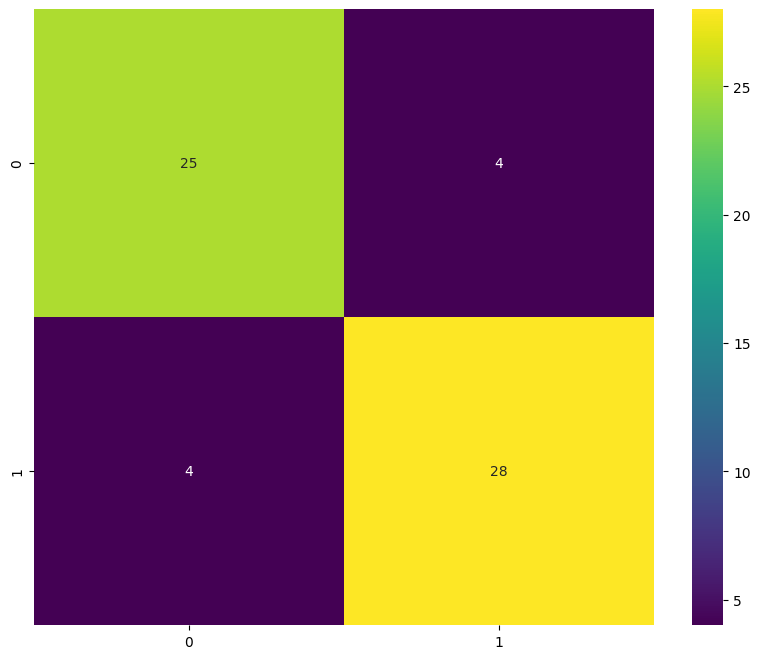

In [152]:
sns.heatmap(confusion_matrix(y_test,predicted1),cmap='viridis',annot=True);

AUC value is 0.8685344827586206


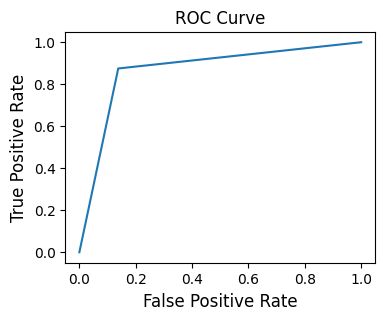

In [153]:

fpr, tpr, threshould = roc_curve(predicted1, y_test)
plt.figure(figsize = (4, 3))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

Bernoulli Naive Bayes

In [154]:

model2 = BernoulliNB
# print("Accuracy is",accuracy_score(y_test_m,predicted2))
# print("Precision is",precision_score(y_test_m,predicted2))
# print("Recall is",recall_score(y_test_m,predicted2))
# print("F1 score is",f1_score(y_test_m,predicted2))
# print("Confusion matrix is"+"\n", confusion_matrix(y_test_m,predicted2))
# print("")
# print(classification_report(y_test_m,predicted2))

print("Accuracy is",accuracy_score(y_test,predicted2))
print("Precision is",precision_score(y_test,predicted2))
print("Recall is",recall_score(y_test,predicted2))
print("F1 score is",f1_score(y_test,predicted2))
print("Confusion matrix is"+"\n", confusion_matrix(y_test,predicted2))
print("")
print(classification_report(y_test,predicted2))

Accuracy is 0.8688524590163934
Precision is 0.9
Recall is 0.84375
F1 score is 0.870967741935484
Confusion matrix is
 [[26  3]
 [ 5 27]]

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



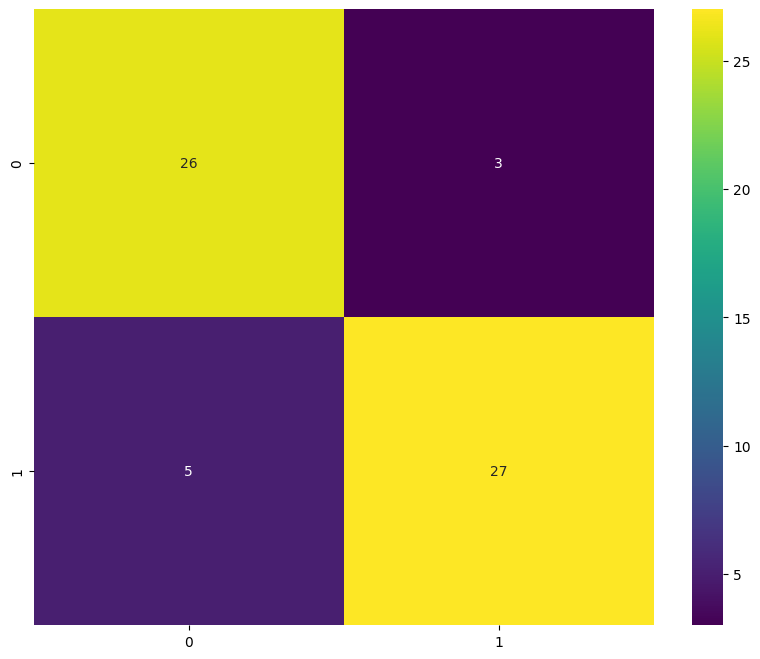

In [155]:

sns.heatmap(confusion_matrix(y_test,predicted2),cmap='viridis',annot=True);

AUC value is 0.8693548387096774


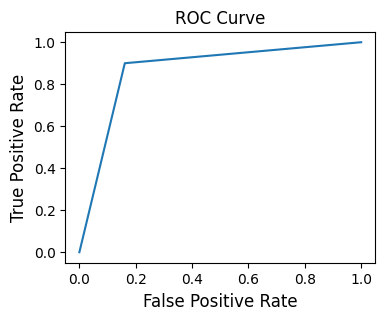

In [156]:

fpr, tpr, threshould = roc_curve(predicted2, y_test)
plt.figure(figsize = (4, 3))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

Multinomial Naive Bayes

In [157]:
model3 = MultinomialNB
# print("Accuracy is",accuracy_score(y_test_m,predicted3))
# print("Precision is",precision_score(y_test_m,predicted3))
# print("Recall is",recall_score(y_test_m,predicted3))
# print("F1 score is",f1_score(y_test_m,predicted3))
# print("Confusion matrix is"+"\n", confusion_matrix(y_test_m,predicted2))
# print("")
# print(classification_report(y_test_m,predicted3))

print("Accuracy is",accuracy_score(y_test,predicted3))
print("Precision is",precision_score(y_test,predicted3))
print("Recall is",recall_score(y_test,predicted3))
print("F1 score is",f1_score(y_test,predicted3))
print("Confusion matrix is"+"\n", confusion_matrix(y_test,predicted2))
print("")
print(classification_report(y_test,predicted3))

Accuracy is 0.819672131147541
Precision is 0.8181818181818182
Recall is 0.84375
F1 score is 0.8307692307692308
Confusion matrix is
 [[26  3]
 [ 5 27]]

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



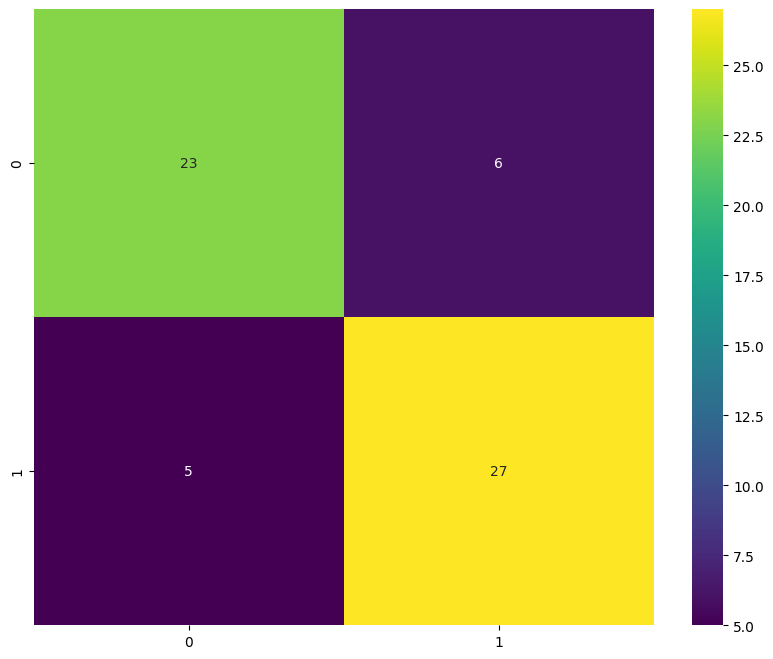

In [158]:

sns.heatmap(confusion_matrix(y_test,predicted3),cmap='viridis',annot=True);


AUC value is 0.8198051948051949


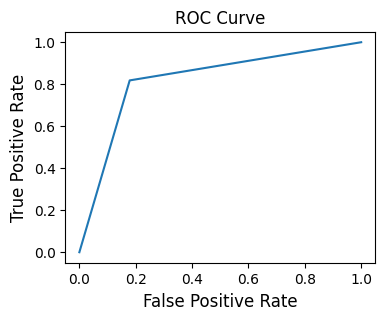

In [159]:
fpr, tpr, threshould = roc_curve(predicted3, y_test)
plt.figure(figsize = (4, 3))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))